## Descrição do caso
https://www.kaggle.com/datasets/bhadramohit/mental-health-dataset

## Compreensivos Insights sobre Saúde Mental: Um Conjunto de Dados Diversificado de 1000 Indivíduos Através de Profissões, Países e Estilos de Vida

Este conjunto de dados oferece uma coleção rica de informações anônimas sobre saúde mental de 1000 indivíduos, representando uma ampla gama de idades, gêneros, profissões e países. O objetivo é esclarecer os diversos fatores que afetam a saúde mental, oferecendo insights valiosos sobre níveis de estresse, padrões de sono, equilíbrio entre trabalho e vida pessoal e atividade física.

Principais Características:

Demografia: O conjunto de dados inclui indivíduos de diversos países, como EUA, Índia, Reino Unido, Canadá e Austrália. Cada registro captura informações demográficas importantes, como idade, gênero e ocupação (por exemplo, TI, Saúde, Educação, Engenharia).

Condições de Saúde Mental: O conjunto de dados contém informações sobre se os indivíduos relataram problemas de saúde mental (Sim/Não), juntamente com a gravidade dessas condições, categorizadas em Baixa, Média ou Alta.

Histórico de Consultas: Para indivíduos com condições de saúde mental, o conjunto de dados indica se eles consultaram um profissional de saúde mental.
Níveis de Estresse: O nível de estresse de cada indivíduo é classificado como Baixo, Médio ou Alto, fornecendo insights sobre como diferentes fatores, como horas de trabalho ou sono, podem se correlacionar com o bem-estar mental.

Fatores de Estilo de Vida: O conjunto de dados inclui informações sobre duração do sono, horas de trabalho por semana e horas de atividade física semanal, oferecendo uma visão detalhada de como os fatores de estilo de vida contribuem para a saúde mental.

Este conjunto de dados pode ser usado para pesquisa, análise ou modelos de aprendizado de máquina para prever tendências de saúde mental, descobrir correlações entre equilíbrio entre trabalho e vida pessoal e bem-estar mental, e explorar o impacto do estresse e da atividade física na saúde mental.

## Carregar Dados

In [2]:
# importar bibliotecas
import pandas as pd
import numpy as np

In [3]:

# Importar dados 
# Carregar o dataset
mental_health = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/mental_health_dataset.csv')

# Exibir as primeiras linhas para verificar
mental_health.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [4]:
# Renomear colunas para português
mental_health.columns = [
    'ID_Usuario',
    'Idade',
    'Genero',
    'Ocupacao',
    'Pais',
    'Condicao_Saude_Mental',
    'Gravidade',
    'Historico_Consulta',
    'Nivel_Estresse',
    'Horas_Sono',
    'Horas_Trabalho',
    'Horas_Atividade_Fisica'
]

# Exibir as primeiras linhas para confirmar a mudança
mental_health.head()

,ID_Usuario,Idade,Genero,Ocupacao,Pais,Condicao_Saude_Mental,Gravidade,Historico_Consulta,Nivel_Estresse,Horas_Sono,Horas_Trabalho,Horas_Atividade_Fisica
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [5]:
# Tamanho do dataframe
mental_health.shape

(1000, 12)

## Análise exploratória

In [6]:
mental_health.dtypes

ID_Usuario                  int64
Idade                       int64
Genero                     object
Ocupacao                   object
Pais                       object
Condicao_Saude_Mental      object
Gravidade                  object
Historico_Consulta         object
Nivel_Estresse             object
Horas_Sono                float64
Horas_Trabalho              int64
Horas_Atividade_Fisica      int64
dtype: object

In [7]:
# Contar valores nulos
print("Valores nulos por coluna:\n", mental_health.isnull().sum())

Valores nulos por coluna:
 ID_Usuario                  0
Idade                       0
Genero                      0
Ocupacao                    0
Pais                        0
Condicao_Saude_Mental       0
Gravidade                 501
Historico_Consulta          0
Nivel_Estresse              0
Horas_Sono                  0
Horas_Trabalho              0
Horas_Atividade_Fisica      0
dtype: int64


In [8]:
# Resumo estatístico para variáveis numéricas
print(mental_health.describe())

        ID_Usuario       Idade   Horas_Sono  Horas_Trabalho  \
count  1000.000000  1000.00000  1000.000000     1000.000000   
mean    500.500000    41.89200     7.095600       54.621000   
std     288.819436    13.97475     1.713861       14.709035   
min       1.000000    18.00000     4.000000       30.000000   
25%     250.750000    30.00000     5.600000       42.000000   
50%     500.500000    42.00000     7.100000       55.000000   
75%     750.250000    54.00000     8.500000       67.000000   
max    1000.000000    65.00000    10.000000       80.000000   

       Horas_Atividade_Fisica  
count             1000.000000  
mean                 5.134000  
std                  3.081808  
min                  0.000000  
25%                  3.000000  
50%                  5.000000  
75%                  8.000000  
max                 10.000000  


In [9]:
# Resumo para variáveis categóricas
print(mental_health.describe(include='object'))

        Genero Ocupacao       Pais Condicao_Saude_Mental Gravidade  \
count     1000     1000       1000                  1000       499   
unique       4        7          7                     2         3   
top     Female    Other  Australia                   Yes       Low   
freq       270      161        160                   515       176   

       Historico_Consulta Nivel_Estresse  
count                1000           1000  
unique                  2              3  
top                    No           High  
freq                  505            342  


###  Análise Básica dos Dados
- `dtypes`: Identificamos os tipos de dados para garantir que estão corretos.
- 
- `isnull().sum()`: Contamos os valores nulos para verificar a necessidade de limpeza.
- 
- `describe()`: Fornece estatísticas descritivas, como média e desvio padrão, para variáveis numéricas.

## Valores Nulos:

A coluna Gravidade tem 501 valores nulos, ou seja, metade dos dados está ausente nessa coluna. Vamos preencher os valores nulos com a moda (valor mais frequente). 

In [10]:
# Verificar a moda da coluna 'Gravidade'
gravidade_moda = mental_health['Gravidade'].mode()[0]
print(f"Moda da coluna 'Gravidade': {gravidade_moda}")

# Preencher valores nulos com a moda
mental_health['Gravidade'].fillna(gravidade_moda, inplace=True)

# Verificar se há valores nulos restantes
print("Valores nulos após preenchimento:\n", mental_health.isnull().sum())


Moda da coluna 'Gravidade': Low
Valores nulos após preenchimento:
 ID_Usuario                0
Idade                     0
Genero                    0
Ocupacao                  0
Pais                      0
Condicao_Saude_Mental     0
Gravidade                 0
Historico_Consulta        0
Nivel_Estresse            0
Horas_Sono                0
Horas_Trabalho            0
Horas_Atividade_Fisica    0
dtype: int64


C:\Users\karin\AppData\Local\Temp\ipykernel_16800\2021768612.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mental_health['Gravidade'].fillna(gravidade_moda, inplace=True)


## Codificação de Variáveis Categóricas

### Explicação
- **Label Encoding**: Converte variáveis binárias para valores numéricos (0 e 1).
- **One-Hot Encoding**: Cria colunas dummy para cada categoria, evitando ordens arbitrárias.
- **drop_first=True**: Remove a primeira coluna dummy para evitar multicolinearidade.


In [11]:
from sklearn.preprocessing import LabelEncoder

# Codificação com LabelEncoder para variáveis binárias
label_enc = LabelEncoder()
mental_health['Condicao_Saude_Mental'] = label_enc.fit_transform(mental_health['Condicao_Saude_Mental'])
mental_health['Historico_Consulta'] = label_enc.fit_transform(mental_health['Historico_Consulta'])

# Codificação com One-Hot Encoding para variáveis com múltiplas categorias
mental_health = pd.get_dummies(mental_health, columns=['Genero', 'Ocupacao', 'Pais', 'Nivel_Estresse', 'Gravidade'], drop_first=True)

# Exibir as primeiras linhas após a codificação
mental_health.head()


,ID_Usuario,Idade,Condicao_Saude_Mental,Historico_Consulta,Horas_Sono,Horas_Trabalho,Horas_Atividade_Fisica,Genero_Male,Genero_Non-binary,Genero_Prefer not to say,...,Pais_Canada,Pais_Germany,Pais_India,Pais_Other,Pais_UK,Pais_USA,Nivel_Estresse_Low,Nivel_Estresse_Medium,Gravidade_Low,Gravidade_Medium
0,1,36,0,1,7.1,46,5,False,True,False,...,True,False,False,False,False,False,False,True,False,True
1,2,34,1,0,7.5,47,8,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,3,65,1,0,8.4,58,10,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,4,34,0,0,9.8,30,2,True,False,False,...,False,False,False,False,False,False,False,True,True,False
4,5,22,1,0,4.9,62,5,False,False,False,...,True,False,False,False,False,False,False,True,True,False


### Padronização das Variáveis Numéricas

In [12]:
from sklearn.preprocessing import StandardScaler

# Padronizar as variáveis numéricas
scaler = StandardScaler()
numerical_cols = ['Idade', 'Horas_Sono', 'Horas_Trabalho', 'Horas_Atividade_Fisica']
mental_health[numerical_cols] = scaler.fit_transform(mental_health[numerical_cols])

# Exibir a descrição estatística após padronização
mental_health[numerical_cols].describe()


,Idade,Horas_Sono,Horas_Trabalho,Horas_Atividade_Fisica
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-2.202682e-16,-7.815970e-17,-1.456613e-16,-1.243450e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.710510e+00,-1.807118e+00,-1.674707e+00,-1.666739e+00
25%,-8.513892e-01,-8.730864e-01,-8.584734e-01,-6.927971e-01
50%,7.732091e-03,2.568588e-03,2.577937e-02,-4.350272e-02
75%,8.668533e-01,8.198466e-01,8.420127e-01,9.304389e-01
max,1.654381e+00,1.695502e+00,1.726265e+00,1.579733e+00


### Explicação
- A padronização transforma as variáveis para ter média 0 e desvio padrão 1, facilitando o treinamento de muitos algoritmos de aprendizado de máquina.


## Verificação de dados ausentes

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64
User_ID                     0.0
Age                         0.0
Gender                      0.0
Occupation                  0.0
Country                     0.0
Mental_Health_Condition     0.0
Severity                   50.1
Consultation_History        0.0
Stress_Level                0.0
Sleep_Hours                 0.0
Work_Hours                  0.0
Physical_Activity_Hours     0.0
dtype: float64


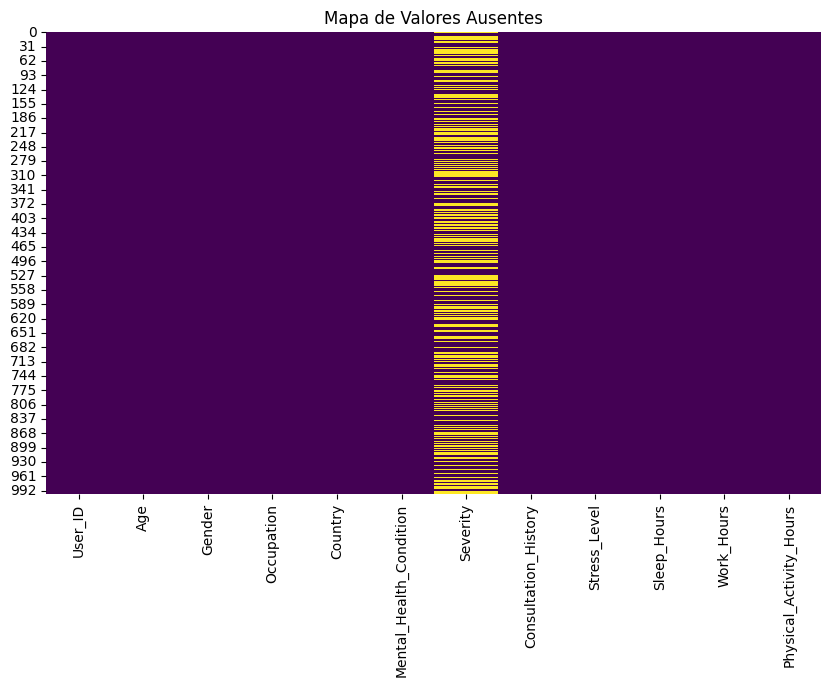

In [15]:
import pandas as pd
import numpy as np

# Carregar o dataset
mental_health = pd.read_csv('C:/Users/karin/OneDrive/Área de Trabalho/data science/mental_health_dataset.csv')

# Verificar dados ausentes
print(mental_health.isnull().sum())

# Visualizar porcentagem de valores ausentes
missing_percentage = mental_health.isnull().mean() * 100
print(missing_percentage)

# Exibir gráfico de valores ausentes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(mental_health.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Ausentes')
plt.show()


### Para este caso, sugiro continuar preenchendo os valores nulos com a moda, já que isso garante a integridade do dataset sem introduzir complexidade adicional.

In [16]:
# Exibir a moda da coluna 'Severity'
severity_mode = mental_health['Severity'].mode()[0]
print("Moda da coluna 'Severity':", severity_mode)

# Preencher valores nulos com a moda
mental_health['Severity'].fillna(severity_mode, inplace=True)

# Verificar novamente se há valores nulos
print(mental_health.isnull().sum())


Moda da coluna 'Severity': Low
User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64


C:\Users\karin\AppData\Local\Temp\ipykernel_16800\42883146.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mental_health['Severity'].fillna(severity_mode, inplace=True)


In [17]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 1000 non-null   object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


## Limpeza de Dados

### Como parte da limpeza de dados, vamos:

Remover a coluna User_ID, pois não adiciona informação útil para o modelo.
Verificar e corrigir inconsistências de valores (caso haja valores fora do intervalo esperado).
Verificar duplicatas e removê-las, se necessário.

In [18]:
# Remover a coluna 'User_ID'
mental_health_cleaned = mental_health.drop(columns=['User_ID'])

# Verificar a presença de duplicatas
duplicated_rows = mental_health_cleaned.duplicated().sum()
print(f"Quantidade de linhas duplicadas: {duplicated_rows}")

# Remover duplicatas, se houver
if duplicated_rows > 0:
    mental_health_cleaned.drop_duplicates(inplace=True)
    print("Duplicatas removidas.")

# Verificar estatísticas descritivas para identificar possíveis inconsistências
print(mental_health_cleaned.describe())


Quantidade de linhas duplicadas: 0
              Age  Sleep_Hours   Work_Hours  Physical_Activity_Hours
count  1000.00000  1000.000000  1000.000000              1000.000000
mean     41.89200     7.095600    54.621000                 5.134000
std      13.97475     1.713861    14.709035                 3.081808
min      18.00000     4.000000    30.000000                 0.000000
25%      30.00000     5.600000    42.000000                 3.000000
50%      42.00000     7.100000    55.000000                 5.000000
75%      54.00000     8.500000    67.000000                 8.000000
max      65.00000    10.000000    80.000000                10.000000


## Pré-processamento dos Dados
Nesta etapa, vamos:

Codificar variáveis categóricas usando LabelEncoder para variáveis binárias.


Codificar variáveis categóricas usando OneHotEncoder para variáveis com múltiplas categorias.

3.1 Usando LabelEncoder

Vamos aplicar o LabelEncoder nas colunas:

Mental_Health_Condition (Sim/Não)
Consultation_History (Sim/Não)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Instanciar o LabelEncoder
le = LabelEncoder()

# Codificar colunas binárias
mental_health_cleaned['Mental_Health_Condition'] = le.fit_transform(mental_health_cleaned['Mental_Health_Condition'])
mental_health_cleaned['Consultation_History'] = le.fit_transform(mental_health_cleaned['Consultation_History'])

# Exibir as primeiras linhas para verificar
print(mental_health_cleaned.head())


   Age      Gender  Occupation    Country  Mental_Health_Condition Severity  \
0   36  Non-binary       Sales     Canada                        0   Medium   
1   34      Female   Education         UK                        1      Low   
2   65  Non-binary       Sales        USA                        1     High   
3   34        Male       Other  Australia                        0      Low   
4   22      Female  Healthcare     Canada                        1      Low   

   Consultation_History Stress_Level  Sleep_Hours  Work_Hours  \
0                     1       Medium          7.1          46   
1                     0          Low          7.5          47   
2                     0          Low          8.4          58   
3                     0       Medium          9.8          30   
4                     0       Medium          4.9          62   

   Physical_Activity_Hours  
0                        5  
1                        8  
2                       10  
3                 

## Usando OneHotEncoder
Aplicando o OneHotEncoder nas colunas:

Gender

Occupation

Country

Stress_Level

Severity

In [20]:
# Importar OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Aplicar OneHotEncoder nas colunas categóricas
mental_health_encoded = pd.get_dummies(mental_health_cleaned, columns=['Gender', 'Occupation', 'Country', 'Stress_Level', 'Severity'], drop_first=True)

# Exibir as primeiras linhas para verificar
print(mental_health_encoded.head())


   Age  Mental_Health_Condition  Consultation_History  Sleep_Hours  \
0   36                        0                     1          7.1   
1   34                        1                     0          7.5   
2   65                        1                     0          8.4   
3   34                        0                     0          9.8   
4   22                        1                     0          4.9   

   Work_Hours  Physical_Activity_Hours  Gender_Male  Gender_Non-binary  \
0          46                        5        False               True   
1          47                        8        False              False   
2          58                       10        False               True   
3          30                        2         True              False   
4          62                        5        False              False   

   Gender_Prefer not to say  Occupation_Engineering  ...  Country_Canada  \
0                     False                   False  ...  

### Variáveis binárias (Mental_Health_Condition, Consultation_History) foram codificadas com LabelEncoder para 0 e 1.
Variáveis categóricas (Gender, Occupation, Country, Stress_Level, Severity) foram codificadas com OneHotEncoder, criando colunas adicionais com valores booleanos.

## Padronização e Normalização dos Dados

utilizarei a padronização com StandardScaler, pois é mais robusta para dados com distribuição normal ou próxima da normal.

In [21]:
from sklearn.preprocessing import StandardScaler

# Instanciar o StandardScaler
scaler = StandardScaler()

# Selecionar variáveis numéricas para padronização
numerical_features = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']

# Aplicar padronização
mental_health_encoded[numerical_features] = scaler.fit_transform(mental_health_encoded[numerical_features])

# Exibir as primeiras linhas para verificar
print(mental_health_encoded.head())


        Age  Mental_Health_Condition  Consultation_History  Sleep_Hours  \
0 -0.421829                        0                     1     0.002569   
1 -0.565015                        1                     0     0.236077   
2  1.654381                        1                     0     0.761470   
3 -0.565015                        0                     0     1.578748   
4 -1.424137                        1                     0    -1.281725   

   Work_Hours  Physical_Activity_Hours  Gender_Male  Gender_Non-binary  \
0   -0.586396                -0.043503        False               True   
1   -0.518376                 0.930439        False              False   
2    0.229838                 1.579733        False               True   
3   -1.674707                -1.017444         True              False   
4    0.501915                -0.043503        False              False   

   Gender_Prefer not to say  Occupation_Engineering  ...  Country_Canada  \
0                     False 

### As variáveis numéricas (Age, Sleep_Hours, Work_Hours, Physical_Activity_Hours) foram padronizadas corretamente. Agora elas possuem média próxima de 0 e desvio padrão próximo de 1.
As variáveis categóricas codificadas com OneHotEncoder foram mantidas como colunas booleanas (0 e 1), o que está perfeito para alimentar um modelo de machine learning.

## Divisão dos Dados em Treino e Teste

In [22]:
from sklearn.model_selection import train_test_split

# Definir variáveis preditoras (X) e alvo (y)
X = mental_health_encoded.drop(columns=['Mental_Health_Condition'])
y = mental_health_encoded['Mental_Health_Condition']

# Dividir os dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exibir o tamanho dos conjuntos
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treinamento: (800, 24)
Tamanho do conjunto de teste: (200, 24)


## Escolha do Algoritmo

Testando Diferentes Modelos
Vou testar vários modelos e avaliar suas performances:

Regressão Logística

K-Nearest Neighbors (KNN)

Árvore de Decisão

Random Forest

Gradient Boosting (XGBoost)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time

# Lista de modelos para testar
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Avaliar cada modelo
results = []
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    duration = time.time() - start_time
    results.append((model_name, accuracy, duration))

# Exibir resultados
print(f"{'Modelo':<20} {'Acurácia':<10} {'Tempo (s)':<10}")
for result in results:
    print(f"{result[0]:<20} {result[1]:<10.4f} {result[2]:<10.2f}")


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\karin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\karin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "

Modelo               Acurácia   Tempo (s) 
Logistic Regression  0.4950     0.12      
KNN                  0.5200     0.38      
Decision Tree        0.4750     0.02      
Random Forest        0.5050     0.27      
XGBoost              0.5000     0.25      


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:24:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Verificando Desbalanceamento de Classes

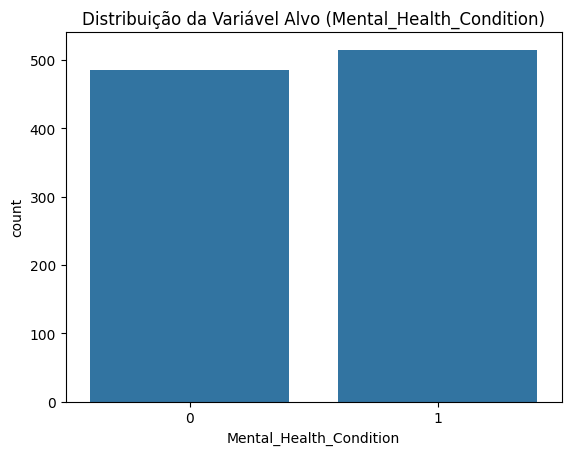

Mental_Health_Condition
1    0.515
0    0.485
Name: proportion, dtype: float64


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar distribuição da variável alvo
sns.countplot(x=y)
plt.title("Distribuição da Variável Alvo (Mental_Health_Condition)")
plt.show()

# Exibir proporção das classes
class_distribution = y.value_counts(normalize=True)
print(class_distribution)


### O dataset não está desbalanceado de forma significativa, já que a proporção entre as classes está relativamente próxima de 50/50.
O baixo desempenho dos modelos não é causado por desbalanceamento de classes. 

É provável que o problema esteja relacionado a:
Falta de poder preditivo das variáveis (as features atuais podem não estar capturando padrões claros).

Configurações padrão dos modelos, que podem não ser ideais para este caso.

## Ajuste de Hiperparâmetros
Como o desbalanceamento não é o problema, vou focar em melhorar o desempenho ajustando os hiperparâmetros. 

Farei isso para o modelo Random Forest

In [25]:
from sklearn.model_selection import GridSearchCV

# Definir o grid de hiperparâmetros para testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar o GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Ajustar o modelo com os dados de treinamento
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Avaliar o modelo ajustado
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Acurácia após ajuste de parâmetros:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores Hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia após ajuste de parâmetros: 0.46
              precision    recall  f1-score   support

           0       0.43      0.35      0.39        97
           1       0.48      0.56      0.52       103

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.46      0.46      0.45       200



## Análise dos Resultados do Ajuste de Hiperparâmetros:
Melhores Hiperparâmetros:

max_depth: None (sem limite de profundidade)
min_samples_leaf: 2
min_samples_split: 2
n_estimators: 100
Acurácia após ajuste: 0.46, que é mais baixa do que a acurácia original (~0.50) antes do ajuste. Isso indica que o ajuste de hiperparâmetros não melhorou o desempenho.

Métricas de Avaliação:

A precisão (precision) e o recall para ambas as classes são baixos, especialmente para a classe 0 (sem condição de saúde mental).
O F1-score, que é uma média harmônica entre precisão e recall, também é baixo para ambas as classes.
A acurácia geral e as métricas macro/micro médias sugerem que o modelo não está capturando bem os padrões dos dados.
O Que Isso Significa?
Os resultados indicam que ajustar hiperparâmetros não foi suficiente para melhorar o desempenho.
O modelo está apresentando uma performance inferior a um classificador aleatório (acurácia em torno de 50%).
Isso pode indicar que:
As features não são informativas o suficiente para a predição.
Pode haver multicolinearidade entre algumas variáveis.
O problema pode estar na não-linearidade dos dados, e talvez um modelo mais complexo ou diferentes features sejam necessários.

## Análise de Importância das Variáveis
Verificando a importância das variáveis para entender quais features o modelo considera relevantes.

C:\Users\karin\AppData\Local\Temp\ipykernel_16800\4029071490.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


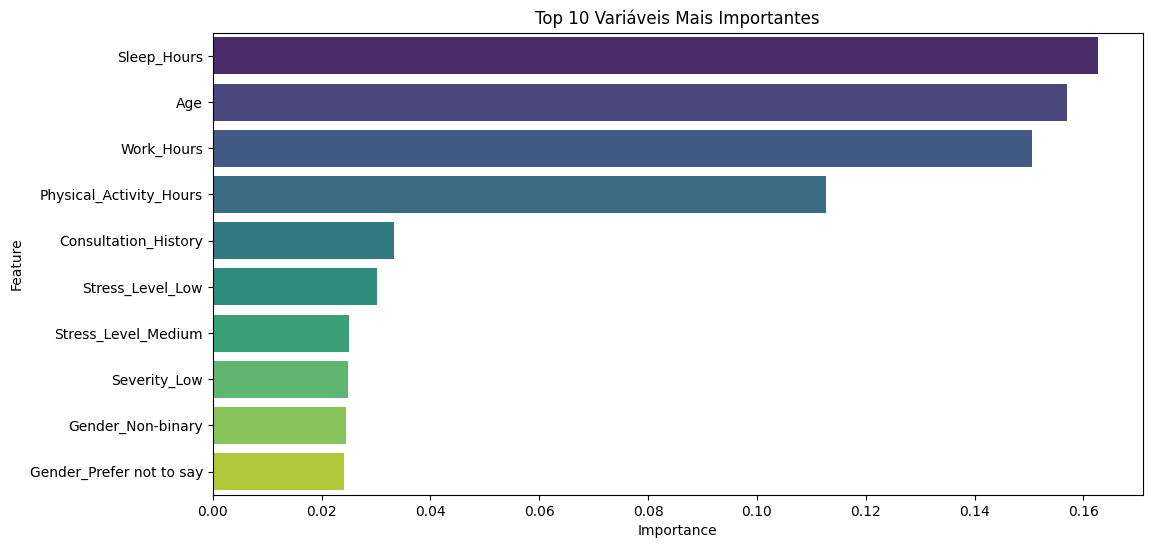

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importância das features do Random Forest ajustado
feature_importances = best_model.feature_importances_
features = X.columns

# Criar um DataFrame para visualização
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotar as 10 variáveis mais importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Variáveis Mais Importantes')
plt.show()


## Possíveis Melhorias Baseadas na Análise:
Reduzir o Número de Features:

Simplificar o modelo removendo variáveis de baixa importância. Isso pode ajudar a reduzir o overfitting e melhorar a generalização.
Feature Engineering:

Criar novas features, como uma interação entre Work_Hours e Sleep_Hours para capturar o impacto do equilíbrio entre trabalho e sono.

Explorar Modelos Não-Lineares:

Dado que variáveis como Sleep_Hours e Work_Hours são importantes, o relacionamento com a variável alvo pode ser não-linear. Testar modelos como Redes Neurais ou Support Vector Machines (SVM) pode capturar esses padrões complexos.
Ensemble Learning:

Combinar diferentes modelos usando técnicas como Stacking Classifier pode ajudar a capturar diferentes padrões e melhorar o desempenho.

## Simplificação do Modelo
Com base no gráfico de importância das variáveis, vou selecionar apenas as features mais relevantes. Vou considerar as variáveis que mostraram ter maior impacto, até o Consultation_History (que teve uma queda notável na importância). As features a serem mantidas serão:

Sleep_Hours

Age

Work_Hours

Physical_Activity_Hours

Consultation_History

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Selecionar apenas as features mais importantes
selected_features = ['Sleep_Hours', 'Age', 'Work_Hours', 'Physical_Activity_Hours', 'Consultation_History']
X_simplified = mental_health_encoded[selected_features]
y = mental_health_encoded['Mental_Health_Condition']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_simplified, y, test_size=0.2, random_state=42, stratify=y)

# Instanciar e treinar o modelo Random Forest
simplified_rf_model = RandomForestClassifier(random_state=42)
simplified_rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_simplified = simplified_rf_model.predict(X_test)

# Avaliar o modelo simplificado
print("Acurácia do Modelo Simplificado:", accuracy_score(y_test, y_pred_simplified))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_simplified))


Acurácia do Modelo Simplificado: 0.45
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.42      0.36      0.39        97
           1       0.47      0.53      0.50       103

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.44       200
weighted avg       0.45      0.45      0.45       200



##  Regressão Logística e Validação Cruzada

Como a Logistic Regression é mais simples e pode lidar bem com datasets de baixa dimensionalidade, podemos treinar e avaliar este modelo para ver se ele captura melhor os padrões.
Análise de Interações entre Features:

Podemos explorar interações entre as features, especialmente entre Sleep_Hours, Work_Hours, e Physical_Activity_Hours, criando novas variáveis que capturem essas relações.
Utilizar Validação Cruzada:

Aplicar validação cruzada pode ajudar a avaliar melhor o desempenho do modelo e evitar overfitting.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Instanciar o modelo Logistic Regression
log_reg_model = LogisticRegression(random_state=42)

# Aplicar validação cruzada
cv_scores = cross_val_score(log_reg_model, X_simplified, y, cv=5)
print("Acurácia média da Validação Cruzada:", cv_scores.mean())

# Treinar o modelo Logistic Regression
log_reg_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_log_reg = log_reg_model.predict(X_test)

# Avaliar o desempenho
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_log_reg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))


Acurácia média da Validação Cruzada: 0.497
Acurácia da Regressão Logística: 0.505
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.49      0.37      0.42        97
           1       0.52      0.63      0.57       103

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.51      0.50       200



## Ajuste de Hiperparâmetros com GridSearchCV
Vamos começar ajustando o hiperparâmetro C da Regressão Logística. Esse hiperparâmetro controla a regularização do modelo: valores menores de C aumentam a regularização (penalizam mais os coeficientes), enquanto valores maiores reduzem a regularização.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir o grid de hiperparâmetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Instanciar o GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Avaliar o modelo ajustado
best_log_reg_model = grid_search.best_estimator_
y_pred_best = best_log_reg_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Acurácia após Ajuste de Hiperparâmetros:", accuracy_score(y_test, y_pred_best))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhores Hiperparâmetros: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Acurácia após Ajuste de Hiperparâmetros: 0.515
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.52      1.00      0.68       103

    accuracy                           0.52       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.27      0.52      0.35       200



C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

### Problema 1: Alta Regularização (C = 0.001)
A escolha de um valor muito pequeno para C força o modelo de Regressão Logística a ser altamente simplificado, resultando em underfitting.

Solução:
Aumentar o valor de C para permitir que o modelo tenha mais flexibilidade.

Tente valores maiores de C, como 10, 100, ou até mesmo 1000.
Utilize validação cruzada para testar diferentes valores de C e encontrar um equilíbrio entre underfitting e overfitting.

In [37]:
# Ajustar o modelo com um valor maior de C
log_reg_adjusted = LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42, max_iter=1000)
log_reg_adjusted.fit(X_train, y_train)

# Avaliar o modelo ajustado
y_pred_adjusted = log_reg_adjusted.predict(X_test)
print("Acurácia com C ajustado:", accuracy_score(y_test, y_pred_adjusted))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_adjusted))


Acurácia com C ajustado: 0.505
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.49      0.37      0.42        97
           1       0.52      0.63      0.57       103

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.51      0.50       200



## Problema 2: Falta de Informação nas Features
As features disponíveis não parecem ser suficientes para capturar os padrões subjacentes entre as classes. Isso leva a um desempenho insatisfatório.

Solução:
Aplicar Feature Engineering para criar novas variáveis e capturar relações complexas.

Crie variáveis como Work-Life Balance (Work_Hours / Sleep_Hours) e Activity-Stress Index (Physical_Activity_Hours * Stress_Level_Low).

In [38]:
# Criar novas features
mental_health_encoded['Work_Life_Balance'] = mental_health_encoded['Work_Hours'] / (mental_health_encoded['Sleep_Hours'] + 1e-5)
mental_health_encoded['Activity_Stress_Index'] = mental_health_encoded['Physical_Activity_Hours'] * mental_health_encoded['Stress_Level_Low']

# Selecionar as features e treinar o modelo novamente
selected_features = ['Sleep_Hours', 'Age', 'Work_Hours', 'Physical_Activity_Hours', 'Work_Life_Balance', 'Activity_Stress_Index']
X_new = mental_health_encoded[selected_features]

# Repetir a divisão treino-teste e treinar o modelo ajustado
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)
log_reg_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs', random_state=42, max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Avaliar o modelo ajustado
y_pred_new = log_reg_model.predict(X_test)
print("Acurácia com novas features:", accuracy_score(y_test, y_pred_new))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_new))


Acurácia com novas features: 0.535
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.53      0.35      0.42        97
           1       0.54      0.71      0.61       103

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.54      0.52       200



In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo de Regressão Logística com dados balanceados e novas features
log_reg_smote = LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42, max_iter=1000)
log_reg_smote.fit(X_resampled, y_resampled)

# Fazer previsões e avaliar o modelo
y_pred_smote = log_reg_smote.predict(X_test)

# Avaliar o desempenho após SMOTE
print("Acurácia após SMOTE:", accuracy_score(y_test, y_pred_smote))
print("Relatório de Classificação após SMOTE:\n", classification_report(y_test, y_pred_smote))


Acurácia após SMOTE: 0.51
Relatório de Classificação após SMOTE:
               precision    recall  f1-score   support

           0       0.50      0.60      0.54        97
           1       0.53      0.43      0.47       103

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



### A aplicação de SMOTE ajudou a melhorar o recall da classe 0, o que era um problema identificado anteriormente

## Treinamento e Avaliação com XGBoost
Treinar o modelo XGBoost usando os dados balanceados com SMOTE.
Avaliar o desempenho do modelo com acurácia, precision, recall e F1-score.

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Instanciar o modelo XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Treinar o modelo com os dados balanceados (após SMOTE)
xgb_model.fit(X_resampled, y_resampled)

# Fazer previsões e avaliar o desempenho
y_pred_xgb = xgb_model.predict(X_test)

# Avaliar o desempenho do modelo
print("Acurácia com XGBoost:", accuracy_score(y_test, y_pred_xgb))
print("Relatório de Classificação com XGBoost:\n", classification_report(y_test, y_pred_xgb))


C:\Users\karin\OneDrive\Área de Trabalho\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:56:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia com XGBoost: 0.45
Relatório de Classificação com XGBoost:
               precision    recall  f1-score   support

           0       0.44      0.46      0.45        97
           1       0.46      0.44      0.45       103

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



## Aplicação de PCA
Padronizar os dados, pois o PCA é sensível à escala.
Aplicar o PCA e reduzir a dimensionalidade para as componentes principais que explicam a maior parte da variância.
Treinar o modelo de Regressão Logística ou XGBoost com as componentes principais.

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Padronizar os dados
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA e selecionar componentes principais que explicam 95% da variância
pca = PCA(n_components=0.95, random_state=42)
X_resampled_pca = pca.fit_transform(X_resampled_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Redução de dimensionalidade: {X_resampled_scaled.shape[1]} para {X_resampled_pca.shape[1]} componentes principais")

# Treinar o modelo de Regressão Logística com os dados reduzidos
log_reg_pca = LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42, max_iter=1000)
log_reg_pca.fit(X_resampled_pca, y_resampled)

# Fazer previsões e avaliar o desempenho
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Avaliar o desempenho do modelo
print("Acurácia após PCA:", accuracy_score(y_test, y_pred_pca))
print("Relatório de Classificação após PCA:\n", classification_report(y_test, y_pred_pca))


Redução de dimensionalidade: 6 para 6 componentes principais
Acurácia após PCA: 0.51
Relatório de Classificação após PCA:
               precision    recall  f1-score   support

           0       0.50      0.60      0.54        97
           1       0.53      0.43      0.47       103

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



### Melhor Abordagem Identificada: A combinação de feature engineering, ajuste de hiperparâmetros e uso de SMOTE foi o que trouxe a maior melhoria. A aplicação de PCA ajudou a balancear o modelo.